# Quantum Computing Seminar
David Elkouss
<div>
<img src=https://delkouss.github.io/qctutorial/QuTech_Main.svg width=300px></div>

**What:** A hands on introduction into programming quantum computers (no physics!)

**How:** Jointly workout this notebook
* Binder: https://bit.ly/qcdelft
* GitHub: https://github.com/delkouss/qctutorial/


In [105]:
from qiskit import *

from qiskit.quantum_info import Statevector
from qiskit.extensions import Barrier, CnotGate, RXGate, RYGate, \
                              RZGate, SGate, ToffoliGate, UnitaryGate
from qiskit.circuit import Measure, Gate
from qiskit.visualization import plot_histogram

import numpy as np
EPSILON = 1e-6

backendUnitary = Aer.get_backend('unitary_simulator')
backendStateVector = Aer.get_backend('statevector_simulator')
backendQASM = Aer.get_backend('qasm_simulator')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## The menu for today

* Why quantum computing? 
* Qubit states, gates and measurements
* Quantum circuits

(5 min) pause 

* Encoding functions into unitaries
* Deutch's algorithm
* Simon's algorithm

# Why quantum computing?

## About myself

#### Past
<small>
    <ul>
        <li> Double EE masters Madrid Technical University and ParisTech</li>
        <li> Industry positions Critical Software / Thales Alenia Space</li>
        <li> PhD Computer Science Madrid Technical University</li>
        <li> Postdoc Quantum Information Theory Madrid Complutense University</li>
</small>

#### Currently (since 2017)
<small>
<ul>
    <li>Assistant Professor @Quantum Computer Engineering department - EWI</li>

<li> Junior group leader @QuTech</li>
</small>

## Quantum computers

**What:** <small>
Machines that rely on characteristically quantum phenomena, such as quantum interference and quantum entanglement, to perform computation. 
</small>

**Why:**
<small>
Speedups in computational problems: searching, factoring, simulating quantum systems
</small>

<div><img src="https://delkouss.github.io/qctutorial/qutechfridge.jpg"></div>

## 2012 Nobel prize

<div><img src="https://delkouss.github.io/qctutorial/nobelprize.jpg" width=500px></div>
<div style="text-align:center"><small>Serge Haroche - Dave Wineland. </small></div>



<small>
<p>Their ground-breaking methods have enabled [...] to take the very first steps towards building a new type of super
fast computer based on quantum physics.</p> 

<p>Perhaps the quantum computer will
change our everyday lives in this century in the same radical way as the classical
computer did in the last century.</p>
</small>

## EU funding
<div><img src="https://delkouss.github.io/qctutorial/flagship.png" width=750px></div>

## Industry participation

<div><img src="https://delkouss.github.io/qctutorial/landscape.png" width=600px></div>

## Airbus challenge
<div>
    <img width=700px src=https://delkouss.github.io/qctutorial/airbus.png>
</div>

<div>
<img src="https://delkouss.github.io/qctutorial/QuTech_Main.svg" width=350px>
</div>

* Research institute collaboration of TU Delft and TNO
* Goal: Realize the **quantum computer** and the **quantum internet**
* ~200 members

## Intel and Microsoft invest in QuTech
<div><img src="https://delkouss.github.io/qctutorial/intelms.png" width=800px></div>

## Delft based startups in quantum

<div><img src=https://delkouss.github.io/qctutorial/startups.png width=750px></div>

## State of the art accessible online
<div><img src="https://delkouss.github.io/qctutorial/ibmqe.png" width=800px></div>

## Quantum Inspire
<div><img src="https://delkouss.github.io/qctutorial/qinspire.PNG" width=800px></div>

## Learning quantum computation in TU Delft

<div>
<img src="https://delkouss.github.io/qctutorial/qutechacademymoocs.png">
</div>

<style>.CodeMirror{min-width:100% !important;}</style>
<div>
    <img src="https://delkouss.github.io/qctutorial/qutechacademy.png">
</div>

## CSE3130: intro to quantum CS

* Learn quantum computation by doing
* Not required: knowledge of quantum mechanics! 
* Required:  linear algebra, rudiments of probability, and complex numbers.  
* Required: object oriented programming 

<div><img src=https://imgs.xkcd.com/comics/circuit_diagram.png width=700></div>

## Textbook

<div><img src="https://delkouss.github.io/qctutorial/qiskitbook.png" width=300px></div>

<p>
    </p>
    
<small>
<ul>The qiskit textbook:
    <li> <a href=https://qiskit.org/textbook/preface.html>Official site</a></li>
    <li><a href=https://github.com/Qiskit/qiskit-textbook>Repo</a></li>
    </ul>
<ul>Other resources:
    <li> Scott Aaronson's <a href="https://www.scottaaronson.com/blog/?p=3943">lecture notes</a></li>
<li> John Preskill's <a href=http://www.theory.caltech.edu/~preskill/ph219/index.html#lecture>lecture notes</a></li>
    </ul></small>

# Qubit states, gates and measurements

## Learning goals

* From bit to Qubit

* Notion of superposition

* Predict measurement outcomes of one qubit

* Manipulate qubits via gates

## From bit to qubit

### A classical bit register can be in the state

0 **or** 1

### A quantum bit register can be in the state

$|0\rangle$ **and** $|1\rangle$

Dirac notation, $|\cdot\rangle$ is called a *ket*.

## The qubit

A quantum bit register $|\phi\rangle$ can be in the state

$$|\phi\rangle=a|0\rangle+b|1\rangle$$

where $a,b$ are called probability amplitudes and verify:

$$|a|^2+|b|^2=1$$

with $a,b\in\mathbb C$.


$$|\phi\rangle=a|0\rangle+b|1\rangle$$

---


$$|0\rangle=\begin{pmatrix}1\\0\end{pmatrix}\qquad|1\rangle=\begin{pmatrix}0\\1\end{pmatrix}$$

---
$$|\phi\rangle=a|0\rangle+b|1\rangle=a\begin{pmatrix}1\\0\end{pmatrix}+b\begin{pmatrix}0\\1\end{pmatrix}=\begin{pmatrix}a\\b\end{pmatrix}$$


## Example: vector picture

---

\begin{align}|\phi\rangle&=\frac{1}{\sqrt 3}|0\rangle+\sqrt{\frac{2}{3}}|1\rangle\\
&=\frac{1}{\sqrt 3}\begin{pmatrix}1\\0\end{pmatrix}+\sqrt{\frac{2}{3}}\begin{pmatrix}0\\1\end{pmatrix}\\
&=\begin{pmatrix}\sqrt{\frac{1}{3}}\\\sqrt{\frac{2}{3}}\end{pmatrix}\end{align}


## Which of the following are valid qubit states?
---
* $|0\rangle$
* $\frac{1}{2}|0\rangle+\frac{1}{2}|1\rangle$
* $\frac{1}{\sqrt2}|0\rangle+\frac{1}{\sqrt2}|1\rangle$

## Measurement
<div><img src="https://delkouss.github.io/qctutorial/measure.png" width=700px></div>

1. we find the qubit in state $|0\rangle$, $|1\rangle$ with prob $|\alpha_0|^2$, $|\alpha_1|^2$

2. after the measurement the state is projected to the measurement outcome



## Example: measurement

$$|\phi\rangle=\sqrt{\frac{1}{3}}|0\rangle-\sqrt{\frac{2}{3}}|1\rangle$$

## Gates are unitary matrices
---
<div><img src="https://delkouss.github.io/qctutorial/gates.png" width=500px></div>
   
* $|\Psi_{\textrm{out}}\rangle=U|\Psi_{\textrm{in}}\rangle$

* $U$ is a unitary matrix: $UU^\dagger=U^\dagger U=I$

* $^\dagger$ means conjugate transpose

## Example conjugate transpose

$$A=\begin{pmatrix}1 + i & 3i \\ -2 i & 5\end{pmatrix}$$

$$\textrm{Transpose: }A^T=\begin{pmatrix}1 + i & -2i \\ 3i & 5\end{pmatrix}$$ 

$$\textrm{Conjugate: }A^*=\begin{pmatrix}1 - i & -3i \\ 2 i & 5\end{pmatrix}$$

$$\textrm{Conjugate transpose: }A^\dagger=\begin{pmatrix}1 - i & 2i \\ -3 i & 5\end{pmatrix}$$

## Example $I$ gate

---
* $I=\begin{pmatrix}1 &0\\0&1\end{pmatrix}$

* $|0\rangle\mapsto|0\rangle$
* $|1\rangle\mapsto|1\rangle$

## Example $X$ gate

---
* $X=\begin{pmatrix}0 &1\\1&0\end{pmatrix}$

* $X|0\rangle = \begin{pmatrix}0&1\\1&0\end{pmatrix} \begin{pmatrix}1\\0\end{pmatrix} = \begin{pmatrix}0\\1\end{pmatrix}=|1\rangle$

* $X|1\rangle = \begin{pmatrix}0&1\\1&0\end{pmatrix} \begin{pmatrix}0\\1\end{pmatrix} = \begin{pmatrix}1\\0\end{pmatrix}=|0\rangle$

## Example Hadamard $H$ gate and $|+\rangle,|-\rangle$

---
* $H=\frac{1}{\sqrt 2}\begin{pmatrix}1 &1\\1&-1\end{pmatrix}$

* $H|0\rangle = \frac{1}{\sqrt 2}\begin{pmatrix}1\\1\end{pmatrix}=\frac{1}{\sqrt 2}(|0\rangle+|1\rangle)=|+\rangle$

* $H|1\rangle = \frac{1}{\sqrt 2}\begin{pmatrix}1\\-1\end{pmatrix}=\frac{1}{\sqrt 2}(|0\rangle-|1\rangle)=|-\rangle$

## Example $Z$ gate
* $Z=\begin{pmatrix}1 &0\\0&-1\end{pmatrix}$

* $Z|0\rangle = \begin{pmatrix}1 &0\\0&-1\end{pmatrix} \begin{pmatrix}1\\0\end{pmatrix} = |0\rangle$

* $Z|1\rangle = \begin{pmatrix}1 &0\\0&-1\end{pmatrix} \begin{pmatrix}0\\1\end{pmatrix} = -|1\rangle$

## Quantum circuits: stacking gates
<div><img src="https://delkouss.github.io/qctutorial/stackgates.png"></div>

## A quantum circuit on qiskit

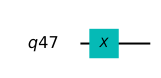

In [86]:
q = QuantumRegister(1) # create one qubit register
qc = QuantumCircuit(q) # create circuit, all qubits initialized to |0>

qc.x(q) # apply X gate 

qc.draw(output='mpl')

In [91]:
job = execute(qc,backendStateVector)
vector = job.result().get_statevector(qc, decimals=3)
print(vector)

[0.+0.j 1.+0.j]


## A trivial game of randomness...

Supppose that we initialize a quantum register in the state $|0\rangle$ and then apply a Hadamard gate. What are the probabilities of the measurement outcomes?

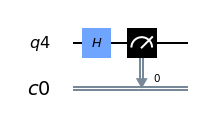

In [17]:
q = QuantumRegister(1) # create one qubit register
r = ClassicalRegister(1) # create one bit register

qc = QuantumCircuit(q,r) # create circuit with a qubit and a bit registers

qc.h(q) # apply H gate

qc.measure(q,r) # measure the state of the qubit register
qc.draw(output='mpl')

In [18]:
job = execute(qc, backendQASM, shots=8192 )
hist = job.result().get_counts()
print(hist)

{'1': 4164, '0': 4028}


## ...which is commercial!

---

<div><img src="https://delkouss.github.io/qctutorial/idquantique.png" width=1100px></div>

## Exercise 1: a biased randomness source
Construct a circuit that takes $|0\rangle$ to a state $|\phi\rangle$ such that if we measure $|\phi\rangle$ in the computational basis the probability of observing outcome $0$ is $p_0=1/4$ and the probability of observing outcome $1$ is $p_1=3/4$.

In [36]:
def exercise1(): 
    q = QuantumRegister(1)
    qc = QuantumCircuit(q)
    # Modify the following unitary such that it performs the desired transformation
    qc.unitary([[1, 0],[0,1]], q) 
    return qc

#### Test correctness
qc = exercise1()
job = execute(qc,backendStateVector)

vector = job.result().get_statevector(qc, decimals=6)
assert np.allclose(np.absolute(vector)**2, [0.25, 0.75]), \
       print("final qubit state incorrect")
print("Passed test")

final qubit state incorrect


AssertionError: None

# Multiqubit circuits

Learning goals:
* Multiqubit states, gates and measurements
* Gate sets
* Notation conventions

## Qubits

A quantum bit register $|\phi\rangle$ can be in the state

$$|\phi\rangle=a_0|0\rangle+a_1|1\rangle$$

where $a_0,a_1\in\mathbb C$ and $\sum_i|a_i|^2=1$.

## A two qubit register $|\phi\rangle$ can be in the state

$$\begin{align}|\phi\rangle&=a_{00}|00\rangle+a_{01}|01\rangle+a_{10}|10\rangle+a_{11}|11\rangle\\
&=a_{00}\begin{pmatrix}1\\0\\0\\0\end{pmatrix}+a_{01}\begin{pmatrix}0\\1\\0\\0\end{pmatrix}+a_{10}\begin{pmatrix}0\\0\\1\\0\end{pmatrix}+a_{11}\begin{pmatrix}0\\0\\0\\1\end{pmatrix}
\end{align}$$

where $a_{00},a_{01},a_{10},a_{11}\in\mathbb C$ and $\sum_i|a_i|^2=1$.

## Example

$$\begin{align}|\phi\rangle&=\frac{1}{\sqrt2}|00\rangle+\frac{1}{\sqrt2}|11\rangle\\
&=\frac{1}{\sqrt2}\begin{pmatrix}1\\0\\0\\0\end{pmatrix}+0\begin{pmatrix}0\\1\\0\\0\end{pmatrix}+0\begin{pmatrix}0\\0\\1\\0\end{pmatrix}+\frac{1}{\sqrt2}\begin{pmatrix}0\\0\\0\\1\end{pmatrix}\\&=\begin{pmatrix}\frac{1}{\sqrt2}\\0\\0\\\frac{1}{\sqrt2}\end{pmatrix}
\end{align}$$

## The state of a $n$-qubit register 

An $n$ qubit register $|\phi\rangle$ can be in the state

$$|\phi\rangle=\sum_{x\in\{0,1\}^n}a_{x}|x\rangle$$

where $a_x\in\mathbb C$ and $\sum_x|a_x|^2=1$.

How many complex parameters we need to specify the state of $|\phi\rangle$?

How many parameters do we need to specify the state of an $n$ bit register?

## Composite systems

The state of a composite system is the tensor product of the components. If we have qubits $A,B$ in the states $|\phi\rangle_A,|\phi\rangle_B$. The composite two qubit system $AB$ is in the state  $$|\phi\rangle_A\otimes|\phi\rangle_B$$

## The tensor product

<p>Let</p> $$M=\begin{pmatrix} m_{00} & m_{01} & \ldots & m_{0(b-1)}\\ \vdots & \vdots &  & \vdots\\ m_{(a-1)0} & m_{(a-1)1} & \ldots & m_{(a-1)(b-1)} \end{pmatrix}$$ 

<p>be an $a\times b$ matrix and $N$ a matrix of dimension $c\times d$.</p><p>Then $M\otimes N$ is a $ac\times bd$ matrix given by</p>

$$M\otimes N=\begin{pmatrix} m_{00}N & m_{01}N & \ldots & m_{0(b-1)}N\\ \vdots & \vdots &  & \vdots\\ m_{(a-1)0}N & m_{(a-1)1}N & \ldots & m_{(a-1)(b-1)}N \end{pmatrix}$$

## Example

The matrix that represents $Z\otimes X$ is:

$$
Z\otimes X= \begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}\otimes \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}= \begin{pmatrix} 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & -1\\ 0 & 0 & -1 & 0\end{pmatrix}
$$

## Example

$$|0\rangle\otimes|0\rangle
= \begin{pmatrix}1 \\ 0 \end{pmatrix}\otimes \begin{pmatrix}1 \\ 0\end{pmatrix}= \begin{pmatrix}  1 \\ 0 \\ 0\\ 0\end{pmatrix}
$$

## Lazy tensor convention

Whenever clear from context, in order to avoid clutter, we will omit the tensor symbol $\otimes$:

$$|\phi\rangle\otimes|\psi\rangle=|\phi\rangle|\psi\rangle$$

Note also that 

$$|00\rangle=|0\rangle\otimes|0\rangle=|0\rangle|0\rangle$$

## Subscript indicates system name

(redundant) The state of qubit $A$ is $|\phi\rangle_A$

The state of the two qubit system $AB$ is 

$$|\phi\rangle_{AB}=\phi_{00}|0\rangle_A|0\rangle_B+\phi_{01}|0\rangle_A|1\rangle_B+\phi_{10}|1\rangle_A|0\rangle_B+\phi_{11}|1\rangle_A|1\rangle_B$$

## Convention

In (qiskit's textbook) qubits are written from least significant to most significant right to left. A state with three qubits could be  

$$|\color{red}i\rangle_2|\color{blue}j\rangle_1|\color{green}k\rangle_0$$


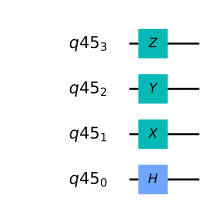

In [82]:
# we will draw them from most significant to least significant from top to bottom
q = QuantumRegister(4) 
qc = QuantumCircuit(q) 
qc.h(0) 
qc.x(1) 
qc.y(2) 
qc.z(3) 
qc.draw(output='mpl', reverse_bits='true')

## Composite gates

* Consider two qubit registers $A,B$ with state $|\phi\rangle_A,|\psi\rangle_B$: the joint system is in the state $|\phi\rangle_A\otimes|\psi\rangle_B$

* If we apply gate $U,V$ to qubits $A,B$, their states become $U|\phi\rangle_A,V|\psi\rangle_B$: the joint system becomes $\left(U|\phi\rangle_A\right)\otimes\left(V|\psi\rangle_B\right)$

* The unitary that performs the mapping 

$$|\phi\rangle_A\otimes|\psi\rangle_B\mapsto \left(U|\phi\rangle_A\right)\otimes\left(V|\psi\rangle_B\right)$$

is 

$$U\otimes V$$

## Example a general gate: CNOT

Consider a gate with the following action and write the corresponding matrix

$$C_0(X):|b\rangle|a\rangle\mapsto|a\oplus b\rangle|a\rangle$$

* $|0\rangle|0\rangle\mapsto|0\oplus 0\rangle|0\rangle=|0\rangle|0\rangle$
* $|0\rangle|1\rangle\mapsto|1\rangle|1\rangle$
* $|1\rangle|0\rangle\mapsto|1\rangle|0\rangle$
* $|1\rangle|1\rangle\mapsto|0\rangle|1\rangle$

$$\begin{matrix}
|00\rangle&|01\rangle&|10\rangle&|11\rangle\\
\end{matrix}\\
\begin{pmatrix}
\,\,\,1\,\,\,&\,\,\,0\,\,\,&\,\,\,0\,\,\,&\,\,\,0\,\,\,\\
0&0&0&1\\
0&0&1&0\\
0&1&0&0
\end{pmatrix}$$

## Qubit measurements for multiqubit states

<div><img src="https://delkouss.github.io/qctutorial/genmeas.png" width=700px></div>

1. we find the qubit in state $|\psi_0\rangle|0\rangle$, $|\psi_0\rangle|1\rangle$ with prob $|\alpha_0|^2$, $|\alpha_1|^2$

2. after the measurement the state is projected to the measurement outcome



## Quantum SWAP

Construct with **cnot gates** a gate that performs the following tranformation:
* $|0\rangle|0\rangle\mapsto|0\rangle|0\rangle$ 
* $|0\rangle|1\rangle\mapsto|1\rangle|0\rangle$
* $|1\rangle|0\rangle\mapsto|0\rangle|1\rangle$
* $|1\rangle|1\rangle\mapsto|1\rangle|1\rangle$

By linearity such a gate swaps the states of a two qubit register:  $|\phi\rangle|\psi\rangle\mapsto|\psi\rangle|\phi\rangle$. 

In [67]:
def exercise2():
    qc = QuantumCircuit(2) 
    # construct a swap with one or several uses of:
    qc.cx(0,1) 
    qc.cx(1,0) 
    return qc

#### Test correctness
qc = exercise2()
qc.swap(qc.qubits[0],qc.qubits[1])
job = execute(qc,backendUnitary)

unitary = job.result().get_unitary(qc, decimals=8)

assert np.abs(np.trace(unitary) / 4)**2 > 1 - EPSILON, print("the gate is different than swap\n", unitary)
print("Passed test")

the gate is different than swap
 [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


AssertionError: None

## SWAP

Suppose that you have two integer variables $\text{int}_2,\text{int}_2$, how do you swap their values?

In [28]:
int1 = 23
int2 = 65
print(int1,int2)
aux = int1
int1 = int2
int2 = aux
print(int1,int2)

23 65
65 23


Can you swap the values *in place*? In place means without any auxiliary variable.

In [93]:
int1 = 23
int2 = 65
print(int1,int2)
int1 = int1 + int2 
int2 = int1 - int2 # = int1 + int2 - int2 = int1
int1 = int1 - int2 # = int1 + int2 - int1 = int2
print(int1,int2)

23 65
65 23


How can we swap in place the values of two bits?

Let $a,b$ be two bit registers
$$\begin{align}
a &= a\oplus b \\
b &= a\oplus b \\
a &= a\oplus b
\end{align}
$$

# Encoding functions into unitaries

## Boolean functions

A Boolean function $f:\{0,1\}^n\rightarrow\{0,1\}^m$ is a map from bit strings of length $n$ to bit strings of length $m$.

## Example

The NOT function is a function from one bit to one bit $\text{NOT}:\{0,1\}\rightarrow\{0,1\}$ defined by $\text{NOT}(x)=x\oplus 1$.

<table style="font-size:100%;width:80%;text-align=center">
  <tr>
    <th>$x$</th>
    <th>$\text{NOT}(x)$</th>
  </tr>
  <tr>
    <td>0</td>
    <td>1</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0</td>
  </tr>    
</table>

<div><img src=https://delkouss.github.io/qctutorial/cnot.png></div>

## Example

The RESET function is a function from one bit to one bit $\text{RESET}:\{0,1\}\rightarrow\{0,1\}$ defined by $\text{RESET}(x)=0$.

<table style="font-size:100%;width:80%;text-align=center">
  <tr>
    <th>$x$</th>
    <th>$\text{RESET}(x)$</th>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0</td>
  </tr>    
</table>

## Example

The AND function is a function from one bit to one bit $\text{NOT}:\{0,1\}^2\rightarrow\{0,1\}$ defined by $\text{AND}(x_1,x_0)=x_1x_0$.

<table style="font-size:60%;width:100%;text-align=center">
  <tr>
    <th>$x_1$</th>
    <th>$x_0$</th>  
    <th>$\text{AND}(x_1,x_0)$</th>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>      
    <td>0</td>
  </tr>
  <tr>
    <td>0</td>
    <td>1</td>      
    <td>0</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0</td>      
    <td>0</td>
  </tr>
  <tr>
    <td>1</td>
    <td>1</td>      
    <td>1</td>
  </tr>
</table>

<div><img src=https://delkouss.github.io/qctutorial/and.png></div>

## Encoding Boolean functions into unitaries

Given $f:\{0,1\}^n\rightarrow\{0,1\}^m$, we can embed it into a unitary $U_f$ acting on $n+m$ qubits such that:

$$
|y\rangle|x\rangle\mapsto|y\oplus f(x)\rangle|x\rangle
$$

where $x\in\{0,1\}^n,y\in\{0,1\}^m$

## Example: unitary for RESET

* $\text{RESET}(x)=0$
* $U_\text{RESET}:|y\rangle|x\rangle\mapsto|y\oplus 0\rangle|x\rangle$

## Examples

How many one bit Boolean functions exist?

Unbalanced functions
* $U_{\text{reset}}: |y\rangle|x\rangle\mapsto|y\rangle|x\rangle$
* $U_{\text{set}}: |y\rangle|x\rangle\mapsto|y\oplus 1\rangle|x\rangle$

Balanced functions
* $U_{\text{identity}}: |y\rangle|x\rangle\mapsto|y\oplus x\rangle|x\rangle$
* $U_{\text{not}}: |y\rangle|x\rangle\mapsto|y\oplus x \oplus 1\rangle|x\rangle$

# Deutch's problem

## Deutsch's problem (1985)

Given an oracle (black-box) implementing, $f$, a one bit Boolean function determine if it is balanced or unbalanced.

## Classical version

* The oracle is a classical machine implementing $f$

* How many times do we need to query the oracle?

## Quantum version

* The oracle is a quantum machine implementing $U_f$
* How many times do we need to query the oracle?

## Deutsch's algorithm

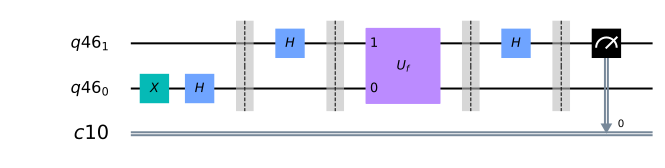

In [83]:
q = QuantumRegister(2)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c) 

qc.x(q[0])
qc.h(q[0])

qc.barrier()
qc.h(q[1]) 
qc.barrier()
g = Gate(name='$U_f$', num_qubits=2, params=[])
qc.append(g, [qc.qregs[0][0],qc.qregs[0][1]])
qc.barrier()
qc.h(q[1]) 
qc.barrier()
qc.measure(q[1],c[0])

qc.draw(output='mpl', reverse_bits="true")

1. Prepare two quantum registers: $\vert0\rangle\vert-\rangle$  
2. Apply a Hadamard gate to top qubit:
$$\begin{align}
H\otimes I\vert0\rangle\vert-\rangle&=\frac{1}{\sqrt 2}\left(\vert0\rangle+\vert1\rangle\right)\vert-\rangle\\
&=\frac{1}{\sqrt2}\sum_{x\in\{0,1\}}|x\rangle\vert-\rangle%\\
%&=\frac{1}{2}\sum_{x\in\{0,1\}}|x\rangle(\vert0\rangle-\vert1\rangle)
\end{align}$$

3. Apply the quantum oracle:
$$\begin{align}U_f\vert x\rangle\vert-\rangle&=\frac{1}{\sqrt 2}(U_f\vert x\rangle\vert0\rangle-U_f\vert x\rangle\vert1\rangle)\\
&=\frac{1}{\sqrt 2}(\vert x\rangle\vert f(x)\rangle-\vert x\rangle\vert1\oplus f(x)\rangle)\end{align}$$


Now let us particularize for $f(x)=0,f(x)=1$:
    $$\begin{align}
    f(x)=0\qquad&|x\rangle\left(|0\rangle-|1\rangle\right)\\
    f(x)=1\qquad&|x\rangle\left(|1\rangle-|0\rangle\right)
    \end{align}
    =(-1)^{f(x)}|x\rangle|-\rangle$$
    
**this is called phase kick back**
$$%\begin{align}
%U_f&\frac{1}{2}\sum_{x\in\{0,1\}}\left(|0\rangle-|1\rangle\right)|x\rangle\\
%&= \frac{1}{2}\sum_{x\in\{0,1\}}\left(|f(x)\rangle-|1\oplus f(x)\rangle\right)|x\rangle
%\end{align}$$

and take this derivation back to the state resulting from the application of the oracle
    $$\begin{align}
    &=\frac{1}{\sqrt2}\sum_{x\in\{0,1\}}(-1)^{f(x)}|x\rangle|-\rangle
    \end{align}$$
which becomes:
<ol>
<li> for balanced functions ($f(0)=f(1)\oplus 1$): $\pm|-\rangle|-\rangle$</li>
<li> for unbalanced functions ($f(0)=f(1)$): $\pm|+\rangle|-\rangle$</li>
</ol>

5. The action of the final Hadamard is:
<ol>
<li> for balanced functions: $|1\rangle|-\rangle$</li>
<li> for unbalanced functions: $|0\rangle|-\rangle$</li>
</ol>


## Recap

* Classic version requires two calls to the oracle
* Quantum version requires a single call to the oracle

In [79]:
q = QuantumRegister(2)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c) 

qc.x(q[0])
qc.h(q[0])

qc.barrier()
qc.h(q[1]) 
qc.barrier()
# unitary implementing balanced or unbalanced function
pass
qc.barrier()
qc.h(q[1]) 
qc.barrier()
qc.measure(q[1],c[0])


job = execute(qc, backendQASM, shots=8192 )
hist = job.result().get_counts()
print(hist)

{'0': 8192}


## Creating arbitrary superpositions

* Notation: $|0\rangle^{\otimes 2}=|0\rangle|0\rangle$
* Construct a circuit that takes $|0\rangle$ to $\frac{1}{\sqrt2}(|0\rangle+ |1\rangle)$ 
* Construct a circuit that takes $|0\rangle^{\otimes 2}$ to $\frac{1}{2}(|00\rangle+ |01\rangle+|10\rangle+ |11\rangle)$ 
* Construct a circuit that takes $|0\rangle^{\otimes n}$ to $\sum_{x\in\{0,1\}^n}2^{-n/2}|x\rangle$ 

## Quantum parallelism

<div><img src="https://delkouss.github.io/qctutorial/parallelism.png" width=800px></div>

## The Hadamard transform

Consider $x\in\{0,1\}^n$. What is the result of $H^{\otimes n}|x\rangle$?

$$H^{\otimes n}|x\rangle=\sum_{y\in\{0,1\}^n}(-1)^{yx}|y\rangle$$

## General structure of quantum algorithms

1.  Initialize the qubits
2. Create superposition
3. Evaluate an interesting Boolean function encoded in a unitary
4. Do some smart processing
5. Measure everything

<div><img src=https://delkouss.github.io/qctutorial/genstructure.png></div>

# Simon's Problem (1994)

<small>Let $f:\{0,1\}^n\rightarrow\{0,1\}^n$ such that for $x,y\in\{0,1\}^n$ with $x\neq y$:
$f(x)=f(y)$ if and only if $y=x\oplus s$
for some unknown $s\neq 0$. </small>

**Problem:** Given an oracle implementation of $f$ find $s$.

## Function example

Consider the function $f(x_1,x_0)=(x_1\oplus x_0,x_1\oplus x_0)$. We have:

$$\begin{align}
f(0,0)&=(0,0)\\
f(0,1)&=(1,1)\\
f(1,0)&=(1,1)\\
f(1,1)&=(0,0)
\end{align}$$

for this function $s=(1,1)$:

$$\begin{align}
f(0,0)&=f(1,1)\\
f(0,1)&=f(1,0)
\end{align}$$

## Classical Solution


* Intuition, we need $x,y$ such that $f(x)=f(y)$ 
* Hard even for probabilistic algorithms, they require on average $\sqrt {2^{n}}$ calls

## Simon's quantum algorithm

<div><center><img src=https://delkouss.github.io/qctutorial/simon_ck.png width=400px></center></div>

## Analysis of Simon's algorithm

The oracle $\text{U}_f$ action is:

$$   \lvert x \rangle\lvert 0 \rangle \rightarrow \lvert x \rangle \lvert f(x) \rangle $$

1. Two $n$-qubit registers initialized to the zero state: 

$$\lvert \psi_1 \rangle = \lvert 0 \rangle^{\otimes n} \lvert 0 \rangle^{\otimes n} $$

2. Apply a Hadamard transform to the top register:    

$$\lvert \psi_2 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} }\lvert x \rangle\lvert 0 \rangle^{\otimes n}   $$

3. Apply $U_f$: 

$$ \lvert \psi_3 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } \lvert x \rangle  \lvert f(x) \rangle $$

4. Measure the bottom register:

$$\lvert \psi_4 \rangle = \frac{1}{\sqrt{2}} \left( \lvert x \rangle + \lvert y \rangle \right) |f(x)\rangle$$

we drop the bottom register as it plays no further role

5. Apply Hadamard on the top register:
    
$$ \lvert \psi_5 \rangle = \frac{1}{\sqrt{2^{n+1}}} \sum_{z \in \{0,1\}^{n} } \left[  (-1)^{x \cdot z} + (-1)^{y \cdot z} \right]  \lvert z \rangle  $$

6. Measuring the top register yields $z$ such that:  

$$ (-1)^{x \cdot z} = (-1)^{y \cdot z} $$

which means:

$$ x \cdot z = y \cdot z \\
     x \cdot z = \left( x \oplus s \right) \cdot z \\
     x \cdot z = x \cdot z \oplus s \cdot z \\
     s \cdot z = 0 \text{ (mod 2)} $$
     
**repeat!**     

## Simon's algorithm

1. Run quantum algorithm $m\approx n$ times: obtain $z_{0},\ldots,z_{m-1}.$

2. Solve the linear system of equations:

$$ \begin{cases} s \cdot z_0 = 0 \\ s \cdot z_2 = 0 \\ ... \\ s \cdot z_{m-1} = 0 \end{cases}$$

## Qiskit implementation

Consider the function $f(x_1,x_0)=(x_1\oplus x_0,x_1\oplus x_0)$, recall $s=11$.

We can implement it (check):

<div><center><img src=https://delkouss.github.io/qctutorial/circuit.png width=400px></center></div>

In [100]:
simonCircuit = QuantumCircuit(4)

# Apply Hadamard gates before querying the oracle
simonCircuit.h(range(2,4)) 
simonCircuit.barrier()

# Apply the query function
## 2-qubit oracle for s = 11
simonCircuit.cx(3, 0)
simonCircuit.cx(3, 1)
simonCircuit.cx(2, 0)
simonCircuit.cx(2, 1)
simonCircuit.barrier()

# Apply Hadamard gates to the input register
simonCircuit.h(range(2,4))

# Measure ancilla qubits
simonCircuit.measure_all()

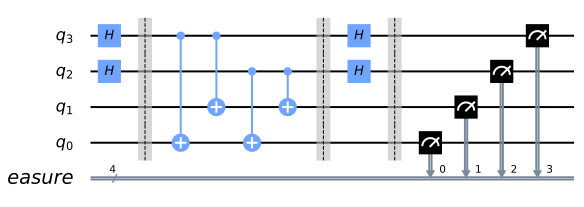

In [101]:
simonCircuit.draw(output='mpl',scale=0.55,reverse_bits="true")

## Experiment with QASM simulator

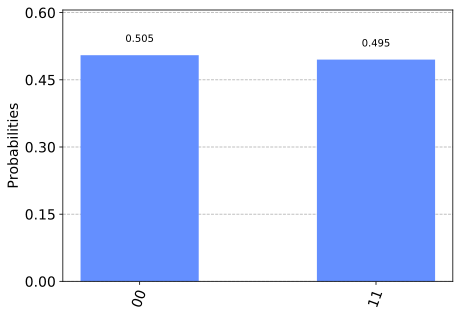

In [106]:
# use local simulator
results = execute(simonCircuit, backend=backendQASM, shots=1024).result()
answer = results.get_counts()

# Categorize measurements by input register values [c3,c2,c1,c0]
answer_plot = {}
for measresult in answer.keys():
    measresult_input = measresult[0:2]
    if measresult_input in answer_plot:
        answer_plot[measresult_input] += answer[measresult]
    else:
        answer_plot[measresult_input] = answer[measresult] 

# Plot the categorized results
plot_histogram(answer_plot)

In [107]:
# Brute force calculation of s
print('s, z, s.z (mod 2)')
for s1 in [0,1]:
    for s0 in [0,1]:
        for measuredz in answer_plot:
            z1 = int(measuredz[0])
            z0 = int(measuredz[1])
            print("s=(",s1,s0,"),z=(",z1,z0,"),sz=",s1*z1^s0*z0)

s, z, s.z (mod 2)
s=( 0 0 ),z=( 1 1 ),sz= 0
s=( 0 0 ),z=( 0 0 ),sz= 0
s=( 0 1 ),z=( 1 1 ),sz= 1
s=( 0 1 ),z=( 0 0 ),sz= 0
s=( 1 0 ),z=( 1 1 ),sz= 1
s=( 1 0 ),z=( 0 0 ),sz= 0
s=( 1 1 ),z=( 1 1 ),sz= 0
s=( 1 1 ),z=( 0 0 ),sz= 0


Using these results, we can recover the value of $s = 11$.

# Recap

* Why quantum computing?
  * It promises speedups
  * Ready to be programmed
* 101 quantum computation
  * Qubit registers are normalized complex vectors
  * Gates are unitary transformations
  * Measurement probability is proportional to the square of the amplitude
* Boolean functions can be embedded into unitaries
* Basic algorithms give speedups for not so interesting problems
* Many more! linear systems of equations, factorization, etc.

# Quantum Computing Seminar
David Elkouss
<div>
<img src=https://delkouss.github.io/qctutorial/QuTech_Main.svg width=300px></div>